In [ ]:
#code to split dataset into test and train in the ratio 0.8 and 0.2
#import splitfolders
#splitfolders.ratio("F:/Mini-Project/prakash-Dataset/Dataset", output="F:/BreastCancer", seed=1337, ratio=(.8, .1,.1), group_prefix=None)

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224, 3]

In [4]:
#train_path = 'F:/VGG161/train'
train_path = 'F:/original/train'

#valid_path = 'F:/VGG161/test'
valid_path = 'F:/original/val'

test_path='F:/original/test'

In [5]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE , weights='imagenet', include_top=False)
for layer in vgg.layers:
  layer.trainable = True

In [6]:

from keras import layers, models, optimizers


conv_base = VGG16(weights='imagenet',
                  include_top=True,
                  input_shape=(224, 224, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
model.summary()



553467904/553467096 [==============================] - 432s 1us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1000)              138357544 
_________________________________________________________________
flatten (Flatten)            (None, 1000)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               256256    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 138,614,057
Trainable params: 256,513
Non-trainable params: 138,357,544
_________________________________________________________________


In [5]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# The list of classes will be automatically inferred from the subdirectory names/structure under train_dir
train_generator = train_datagen.flow_from_directory(
   train_path,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=16,
    class_mode='binary') # because we use binary_crossentropy loss we need binary labels

validation_generator = test_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=16,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_path,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=16,
    class_mode='binary')

Found 614 images belonging to 2 classes.
Found 307 images belonging to 2 classes.
Found 104 images belonging to 2 classes.


In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=20, # batches in the generator are 50, so it takes 320 batches to get to 16000 images
    epochs=50,
    validation_data=validation_generator,
    validation_steps=16)

print("Training Done")
model.save("vgg16_Final_1.h5")

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
20/20 [==============================] - 215s 11s/step - loss: 0.6916 - acc: 0.6032 - val_loss: 0.6883 - val_acc: 0.7852
Epoch 2/50
20/20 [==============================] - 225s 11s/step - loss: 0.6892 - acc: 0.7290 - val_loss: 0.6868 - val_acc: 0.7656
Epoch 3/50
20/20 [==============================] - 207s 10s/step - loss: 0.6873 - acc: 0.7000 - val_loss: 0.6844 - val_acc: 0.7969
Epoch 4/50
20/20 [==============================] - 211s 11s/step - loss: 0.6849 - acc: 0.7516 - val_loss: 0.6832 - val_acc: 0.7539
Epoch 5/50
20/20 [==============================] - 222s 11s/step - loss: 0.6822 - acc: 0.7812 - val_loss: 0.6813 - val_acc: 0.7656
Epoch 6/50
20/20 [==============================] - 231s 12s/step - loss: 0.6812 - acc: 0.7742 - val_loss: 0.6786 - val_acc: 0.7734
Epoch 7/50
20/20 [==============================] - 211s 11s/step - loss: 0.6804 - acc: 0.7563 - val_loss: 0.6780 - val_acc: 0.7617


In [9]:
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

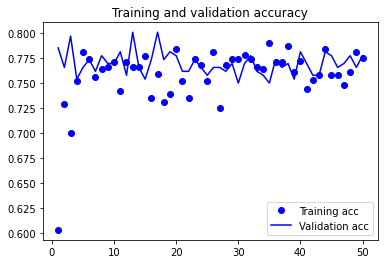

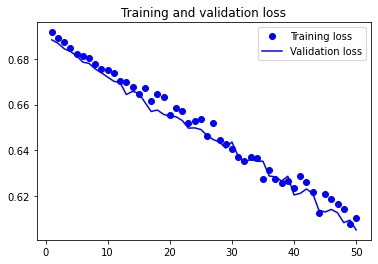

In [10]:
plot_accuracy_and_loss(history)

In [14]:

test_generator = test_datagen.flow_from_directory(test_path,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=16,
    class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=10)
print('test acc:', test_acc)

Found 104 images belonging to 2 classes.
 7/10 [====================>.........] - 67s 10s/step - loss: 0.6072 - acc: 0.7692
test acc: 0.7692307829856873


In [11]:
import tensorflow as tf

from keras.models import load_model
from keras.preprocessing import image
path='F:/Dataset/5.png'

1
Malignant


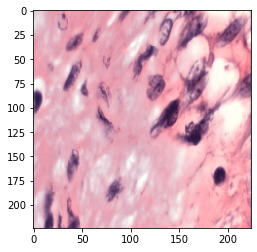

In [12]:
img = image.load_img(path,target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_Jan3_Normal.h5")
 
x=saved_model.predict(img)
x=int(x)
print(x)

if x>0:
  print( "Malignant")
else:
  print("Benign")
